<a href="https://colab.research.google.com/github/2003006/PROJECT1--E/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Importing libraries required for the project.








In [1]:
import pandas as pd
pd.options.mode.chained_assignment= None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm

#2) Loading and previewing the dataset

In [2]:
df = pd.read_csv('/content/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#3) Checking information about our dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        266543 non-null  float64
 1   lng        266543 non-null  float64
 2   desc       266543 non-null  object 
 3   zip        234049 non-null  float64
 4   title      266543 non-null  object 
 5   timeStamp  266543 non-null  object 
 6   twp        266448 non-null  object 
 7   addr       266543 non-null  object 
 8   e          266543 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 18.3+ MB


#3) Data Wrangling

In [4]:
#checking for null values
df.isnull().sum()

lat              0
lng              0
desc             0
zip          32494
title            0
timeStamp        0
twp             95
addr             0
e                0
dtype: int64

In [5]:
#removing null in the zip column
df_wrang_zip = df[pd.notnull(df['zip'])]
df_wrang_zip.isnull().sum()

lat           0
lng           0
desc          0
zip           0
title         0
timeStamp     0
twp          42
addr          0
e             0
dtype: int64

In [6]:
df_wrang = df_wrang_zip[pd.notnull(df_wrang_zip['twp'])]
df_wrang.isnull().sum() 

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [7]:
#checking for duplicates
df_wrang.duplicated().sum()

53

In [8]:
#removing duplicates
df_wrang.drop_duplicates(inplace=True)

In [9]:
#checking if duplicated were droped
df_wrang.duplicated().sum()

0

In [10]:
#chanhing timestamp from object to datetime
df_wrang['timeStamp'] = pd.to_datetime(df_wrang['timeStamp'])
#splitting the timestamp column to get the month,day, week ,day_name and day of week
df_wrang['month']= df_wrang['timeStamp'].dt.month
df_wrang['day_of_month']= df_wrang['timeStamp'].dt.day
df_wrang['day_of_week']= df_wrang['timeStamp'].dt.dayofweek
df_wrang['day_name']= df_wrang['timeStamp'].dt.day_name()
df_wrang.head()
df_wrang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233954 entries, 0 to 266542
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   lat           233954 non-null  float64       
 1   lng           233954 non-null  float64       
 2   desc          233954 non-null  object        
 3   zip           233954 non-null  float64       
 4   title         233954 non-null  object        
 5   timeStamp     233954 non-null  datetime64[ns]
 6   twp           233954 non-null  object        
 7   addr          233954 non-null  object        
 8   e             233954 non-null  int64         
 9   month         233954 non-null  int64         
 10  day_of_month  233954 non-null  int64         
 11  day_of_week   233954 non-null  int64         
 12  day_name      233954 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 25.0+ MB


#Questions

##1)What are the top 10 Zipcodes for 911  & Question 1: Are Zipcodes 19446 and 19090 present ?

In [11]:
#Value cpunts for postal counts
df_wrang.zip.value_counts().sort_values(ascending= False).head(10)

19401.0    18385
19464.0    17935
19403.0    13361
19446.0    12826
19406.0     8815
19002.0     8363
19468.0     7858
19046.0     7336
19454.0     7273
19090.0     6997
Name: zip, dtype: int64

In [12]:
counts=df_wrang.zip.value_counts().sort_values(ascending= False).reset_index(name='counts').head(10)
counts.loc[(counts['index'] == 19446 ) | (counts['index'] == 19090 ) ]
#Zipcodes 19446 and 19090 present among the top 10

,index,counts
3,19446.0,12826
9,19090.0,6997


##2) Compute --What are the top 4 townships (twp) for 911 calls  & Question 2: Which  of the following township are  not present? --LOWER POTTSGROVE, NORRISTOWN, HORSHAM, ABINGTON

In [13]:
df_wrang.twp.value_counts().sort_values(ascending= False).head(4)

LOWER MERION    19438
ABINGTON        15631
NORRISTOWN      14676
POTTSTOWN       10971
Name: twp, dtype: int64

In [14]:
#Locating the townships
count=df_wrang.twp.value_counts().sort_values(ascending= False).reset_index(name='counts').head(4)
count.loc[(count['index']=='LOWER POTTSGROVE') |
          (count['index']=='NORRISTOWN')|
          (count['index']=='HORSHAM')|
          (count['index']=='ABINGTON')]
#LOWER POTTSGROVE and HORSHAM townships ***are not*** among the top 4

,index,counts
1,ABINGTON,15631
2,NORRISTOWN,14676


##3) Compute --Create new features  & Question 3: What is the most common Reason for a 911 call based on Reason Column? Which comes second

In [15]:
#splitting the column title to get reason column
df_wrang['reason'] = df_wrang['title'].apply(lambda title: title.split(':')[0])
df_wrang.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,month,day_of_month,day_of_week,day_name,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,12,10,3,Thursday,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,12,10,3,Thursday,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,12,10,3,Thursday,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,12,10,3,Thursday,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,12,10,3,Thursday,EMS


In [16]:
count1=df_wrang.reason.value_counts().sort_values(ascending= False).head(2)
count1
#Most common is EMS
#Traffic comes second

EMS        121224
Traffic     77752
Name: reason, dtype: int64

##4) Compute --Plot barchart using matplot  for 911 calls by Reason  & Question 4: How can you plot the bars horizontally ?

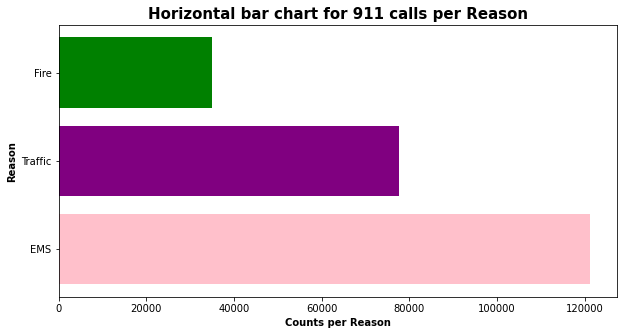

In [17]:
plot = df_wrang['reason'].value_counts().reset_index(name = 'counts')
plot

x =plot['index']
y = plot['counts']
plt.figure(figsize=(10,5))
plt.barh(x,y,color = ['pink','purple','green'],alpha = 1)
plt.xlabel('Counts per Reason',fontweight='bold')
plt.ylabel('Reason',fontweight='bold')
plt.title('Horizontal bar chart for 911 calls per Reason',fontsize=15,fontweight='bold')
plt.show()

##5) Do data manipulation & Question 5: Which day got maximum calls for EMS and how many?

In [18]:
loc = df_wrang.loc[df_wrang['reason'] == 'EMS']
loc.day_name.value_counts().sort_values(ascending= False).head(1)
#Friday is the day EMS calls are got more than other days.

Friday    18036
Name: day_name, dtype: int64

##6) Compute --Create a countplot of the Day of Week column with the hue based of the Reason column & Question 6: On which day traffic calls were lowest ?

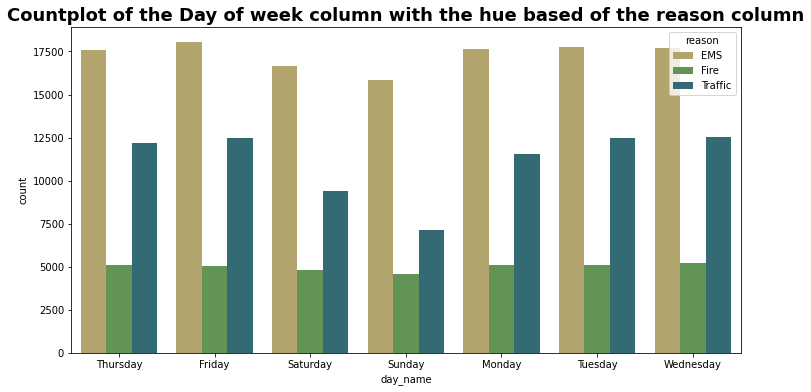

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='day_name',data=df_wrang,hue='reason',palette = 'gist_earth_r')
plt.title('Countplot of the Day of week column with the hue based of the reason column',fontsize = 18,fontweight='bold')
plt.show()
# using the bar chart, sunday was the day of the week which traffic was the least

In [20]:
#locating the day of week where Traffic calls were lowest using a code
traffic=df_wrang.loc[df_wrang['reason'] == 'Traffic']
traffic.day_name.value_counts().sort_values(ascending= True).head(1)

Sunday    7150
Name: day_name, dtype: int64

##7) Create a countplot month wise  --Question 7: Which month saw highest calls for fire?


In [21]:
month_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_wrang['month_name']=df_wrang['month'].map(month_dict)

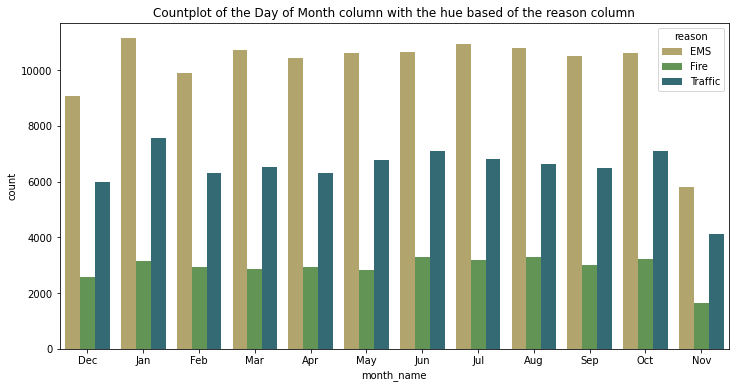

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='month_name',data=df_wrang,hue='reason',palette = 'gist_earth_r')
plt.title('Countplot of the Day of Month column with the hue based of the reason column')
plt.show()
#Using the bar chart, June got the highest calls of fire

In [23]:
#using a code to locate the month with highest calls 
#of fires to confirm with the bar chart analysis

fire=df_wrang.loc[df_wrang['reason'] == 'Fire']
fire.month_name.value_counts().sort_values(ascending=False).head(1)

#Correct the month is JUNE

Jun    3312
Name: month_name, dtype: int64

##8) Compute --Create Web Map for Traffic Calls  & Question 8: Why some areas seem tohave lower or almost zero traffic calls? Hint: Zoom the map

In [24]:
traf=df_wrang.loc[df_wrang['reason']== 'Traffic']
traf.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,month,day_of_month,day_of_week,day_name,reason,month_name
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,12,10,3,Thursday,Traffic,Dec
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,1,12,10,3,Thursday,Traffic,Dec
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:15:49,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,12,10,3,Thursday,Traffic,Dec
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:12:47,CHELTENHAM,OLD YORK RD & VALLEY RD,1,12,10,3,Thursday,Traffic,Dec
15,40.223778,-75.235399,STUMP RD & WITCHWOOD DR; MONTGOMERY; 2015-12-1...,18936.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:31:00,MONTGOMERY,STUMP RD & WITCHWOOD DR,1,12,10,3,Thursday,Traffic,Dec


In [25]:
import folium as fm
SF_COORDINATES = (40.29, -75.581)
MAX_RECORDS=100
map = fm.Map(location=SF_COORDINATES, zoom_start=12,tiles="OpenStreetMap")
fg = fm.FeatureGroup(name="Traffic Location")
for data in traf[0:MAX_RECORDS].iterrows():
 fg.add_child(fm.Marker(location=[data[1]['lat'], data[1]['lng'] 
],icon=fm.Icon(color="red")) )
map.add_child(fg)
map.save("TrafficWebMap.html")
print(map)
